## Implementation of A supervised machine learning algorithm for detecting and predicting fraud in credit card transactions Article
## Mahdi Mahdiani
## Machine Learning Course 
## Prof. : Dr Rezvanian
## Fall 2023

## Import Libraries

In [1]:
import pandas as pd
pd.set_option('display.max_columns',None)
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(18,8)},style='darkgrid')
sns.set_palette('rocket')
from time import time
import pingouin
from scipy.stats import ttest_ind
from datasist.structdata import detect_outliers
from geopy.distance import great_circle
from category_encoders import WOEEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/Users/mahdi/anaconda3/lib/python3.10/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


## Import Dataset 

In [2]:
train = pd.read_csv("/Users/mahdi/Desktop/USC/ML Dr Rezvanian/Presentation/CreditCardTransaction/fraudTrain.csv")
train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
test = pd.read_csv("/Users/mahdi/Desktop/USC/ML Dr Rezvanian/Presentation/CreditCardTransaction/fraudTest.csv")
test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


## Finding Shape of dataset

In [68]:
train.shape

(1296675, 24)

In [69]:
test.shape

(555719, 24)

## ادغام دو دیتاست آموزش و تست با لیبل گذاری جهت تبدیل به حالت اولیه در انتها

In [5]:
train['split'] = 'train'
test['split']='test'
df = pd.concat([train,test],axis=0).reset_index(drop=True)
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,split
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,train
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,train
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,train
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,train
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,train


## پیش پردازش داده ها

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 1017 to 1850558
Data columns (total 16 columns):
 #   Column                Dtype  
---  ------                -----  
 0   cc_freq               int64  
 1   cc_freq_class         int64  
 2   city                  float64
 3   job                   float64
 4   age                   int64  
 5   gender_M              uint8  
 6   merchant              float64
 7   category              float64
 8   distance_km           float64
 9   month                 int64  
 10  day                   int64  
 11  hour                  int64  
 12  hours_diff_bet_trans  int64  
 13  amt                   float64
 14  is_fraud              int64  
 15  split                 object 
dtypes: float64(6), int64(8), object(1), uint8(1)
memory usage: 227.9+ MB


In [7]:
df.shape

(1852394, 24)

## پیش پردازش داده ها

## بررسی دیتای گم شده

In [8]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
split                    0
dtype: int64

## بررسی تکراری بودن

In [9]:
df.duplicated().sum()

0

In [10]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'split'],
      dtype='object')

## سطر های غیر ضروری را حذف می کنیم

In [11]:
df.drop(columns=['Unnamed: 0','street','state','first','last','trans_num','unix_time'],inplace=True)

In [12]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,split
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0,train
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0,train
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0,train
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,47.034331,-112.561071,0,train
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,0,train


In [13]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S')

In [14]:
df['hour'] = df['trans_date_trans_time'].dt.hour
df['day'] = df['trans_date_trans_time'].dt.day_name()
df['month'] = df['trans_date_trans_time'].dt.month

## تمیز کردن ستون merchant

In [15]:
df['merchant'] = df['merchant'].apply(lambda x : x.replace('fraud_',''))

In [16]:
df[['merchant']].head()

,merchant
0,"Rippin, Kub and Mann"
1,"Heller, Gutmann and Zieme"
2,Lind-Buckridge
3,"Kutch, Hermiston and Farrell"
4,Keeling-Crist


## تبدیل تاریخ تولد به سن مشتری

In [17]:
#Date of birth --> Age of customer
df['dob'] = pd.to_datetime(df['dob'],format='%Y-%m-%d %H:%M:%S')
df['age'] = (df['trans_date_trans_time'].dt.year - df['dob'].dt.year).astype(int)
df.drop(columns='dob',inplace=True)

## تبدیل فاصله مشتری تا فروشنده بر حسب کیلومتر

In [18]:
df['distance_km'] = df.apply(lambda col : round(great_circle((col['lat'],col['long']),
                                         (col['merch_lat'],col['merch_long'])).kilometers,2),axis=1)


In [19]:
df.drop(columns=['lat','long','merch_lat','merch_long'],inplace=True)

In [20]:
df.head(2)

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,zip,city_pop,job,is_fraud,split,hour,day,month,age,distance_km
0,2019-01-01 00:00:18,2703186189652095,"Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,28654,3495,"Psychologist, counselling",0,train,0,Tuesday,1,31,78.60
1,2019-01-01 00:00:44,630423337322,"Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,99160,149,Special educational needs teacher,0,train,0,Tuesday,1,41,30.21


In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cc_num,1852394.0,4.173860e+17,1.309115e+18,6.041621e+10,1.800429e+14,3.521417e+15,4.642255e+15,4.992346e+18
amt,1852394.0,7.006357e+01,1.592540e+02,1.000000e+00,9.640000e+00,4.745000e+01,8.310000e+01,2.894890e+04
zip,1852394.0,4.881326e+04,2.688185e+04,1.257000e+03,2.623700e+04,4.817400e+04,7.204200e+04,9.992100e+04
city_pop,1852394.0,8.864367e+04,3.014876e+05,2.300000e+01,7.410000e+02,2.443000e+03,2.032800e+04,2.906700e+06
is_fraud,1852394.0,5.210015e-03,7.199217e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
hour,1852394.0,1.280612e+01,6.815753e+00,0.000000e+00,7.000000e+00,1.400000e+01,1.900000e+01,2.300000e+01
month,1852394.0,7.152067e+00,3.424954e+00,1.000000e+00,4.000000e+00,7.000000e+00,1.000000e+01,1.200000e+01
age,1852394.0,4.621138e+01,1.739545e+01,1.400000e+01,3.300000e+01,4.400000e+01,5.700000e+01,9.600000e+01
distance_km,1852394.0,7.611183e+01,2.911701e+01,2.000000e-02,5.532000e+01,7.822000e+01,9.851000e+01,1.521200e+02


In [22]:
df.describe(include='object').T

,count,unique,top,freq
merchant,1852394,693,Kilback LLC,6262
category,1852394,14,gas_transport,188029
gender,1852394,2,F,1014749
city,1852394,906,Birmingham,8040
job,1852394,497,Film/video editor,13898
split,1852394,2,train,1296675
day,1852394,7,Monday,369418


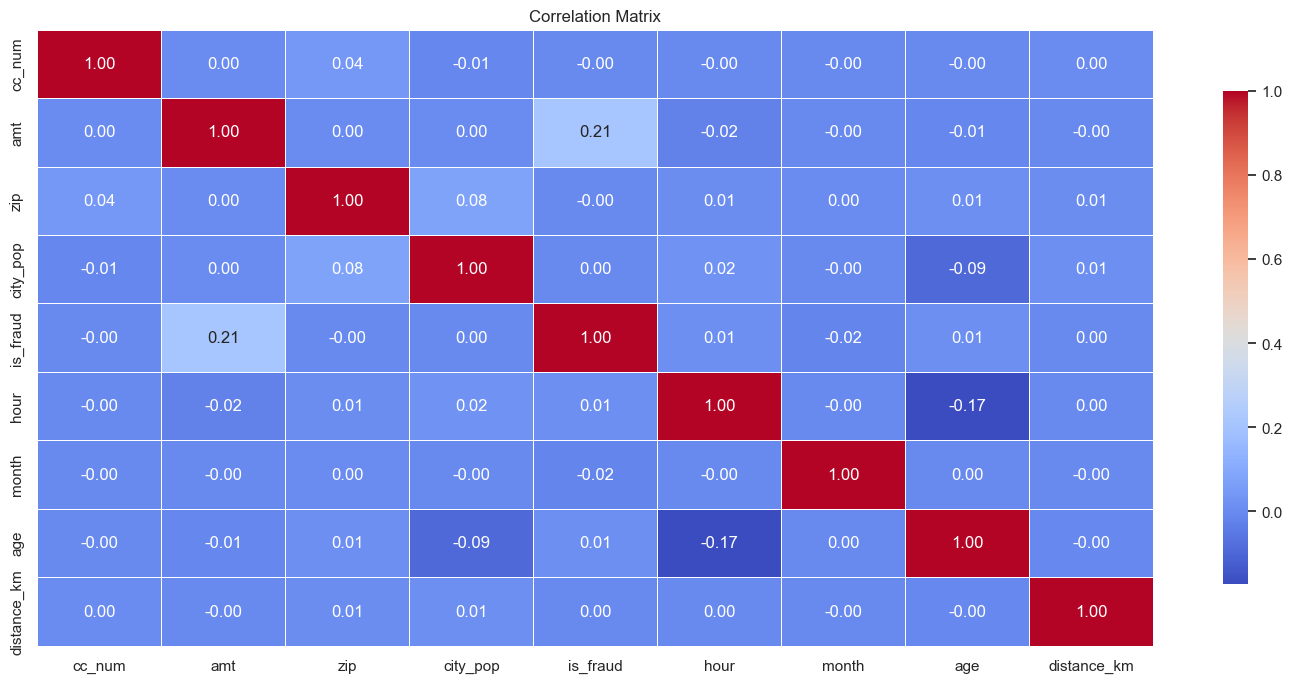

In [23]:
numeric_corr = df.select_dtypes(include='number').corr()

sns.heatmap(numeric_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={"shrink": 0.8})

plt.title('Correlation Matrix')
plt.show()

In [24]:
df.select_dtypes(include='number').corr()

,cc_num,amt,zip,city_pop,is_fraud,hour,month,age,distance_km
cc_num,1.000000,0.001826,0.041504,-0.009118,-0.001125,-0.000902,-0.000188,-0.000131,0.003082
amt,0.001826,1.000000,0.001979,0.004921,0.209308,-0.024891,-0.002593,-0.010695,-0.000538
zip,0.041504,0.001979,1.000000,0.077601,-0.002190,0.005947,0.001160,0.010359,0.006750
city_pop,-0.009118,0.004921,0.077601,1.000000,0.000325,0.019949,-0.000510,-0.090889,0.010989
is_fraud,-0.001125,0.209308,-0.002190,0.000325,1.000000,0.013196,-0.016417,0.010927,0.000359
hour,-0.000902,-0.024891,0.005947,0.019949,0.013196,1.000000,-0.000986,-0.173014,0.000391
month,-0.000188,-0.002593,0.001160,-0.000510,-0.016417,-0.000986,1.000000,0.000060,-0.000067
age,-0.000131,-0.010695,0.010359,-0.090889,0.010927,-0.173014,0.000060,1.000000,-0.004155
distance_km,0.003082,-0.000538,0.006750,0.010989,0.000359,0.000391,-0.000067,-0.004155,1.000000


## رسم نمودار برای داده ها

In [25]:
def bar_plot(col):
    def top_frauds(col):
        return pd.DataFrame(df.loc[df['is_fraud']==1,[col]].value_counts()).reset_index().head(10)
    ax=sns.barplot(data=top_frauds(col),x=col,y='count',palette='bone')
    ax.bar_label(ax.containers[0])
    plt.title(f'Top 10 Frauds | {col}',fontsize=16,fontweight='bold')
    plt.xticks(rotation=45,fontweight='bold')

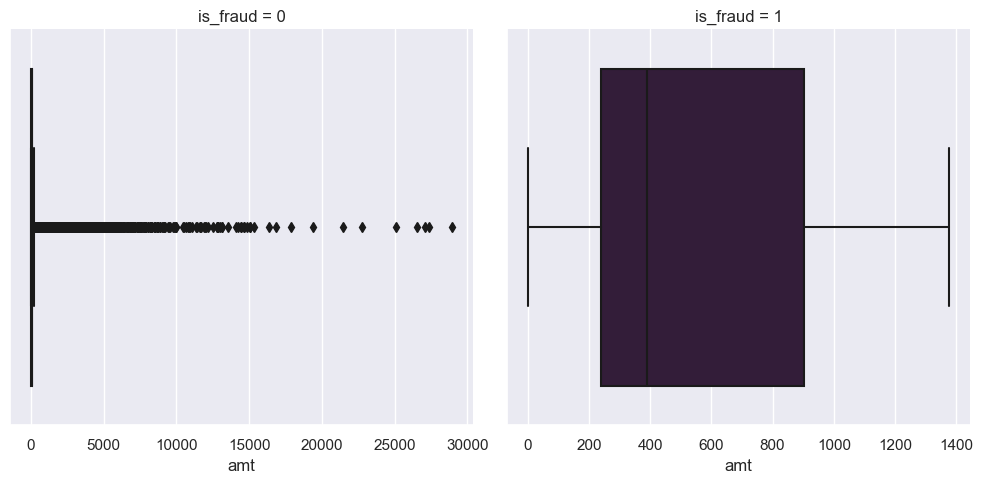

In [27]:
sns.catplot(data=df,x='amt',col='is_fraud',kind='box',sharex=False)

## تابعی برای رسم نمودار

In [28]:
def pie_bar_plot(col):
    print(df[col].value_counts())
    sns.set_palette('viridis')
    fig,axs=plt.subplots(1,2)
    axs[0].pie(df[col].value_counts().values.tolist(),autopct='%.2f%%',textprops={'fontsize':25},explode=[0,0.05],shadow=True)
    sns.countplot(data=df,x=col,ax=axs[1])
    fig.legend(labels=df[col].value_counts().index.tolist(),loc='upper left',fontsize=20)
    fig.tight_layout()
    fig.show()

## رسم نمودار بر اساس جنسیت

F    1014749
M     837645
Name: gender, dtype: int64


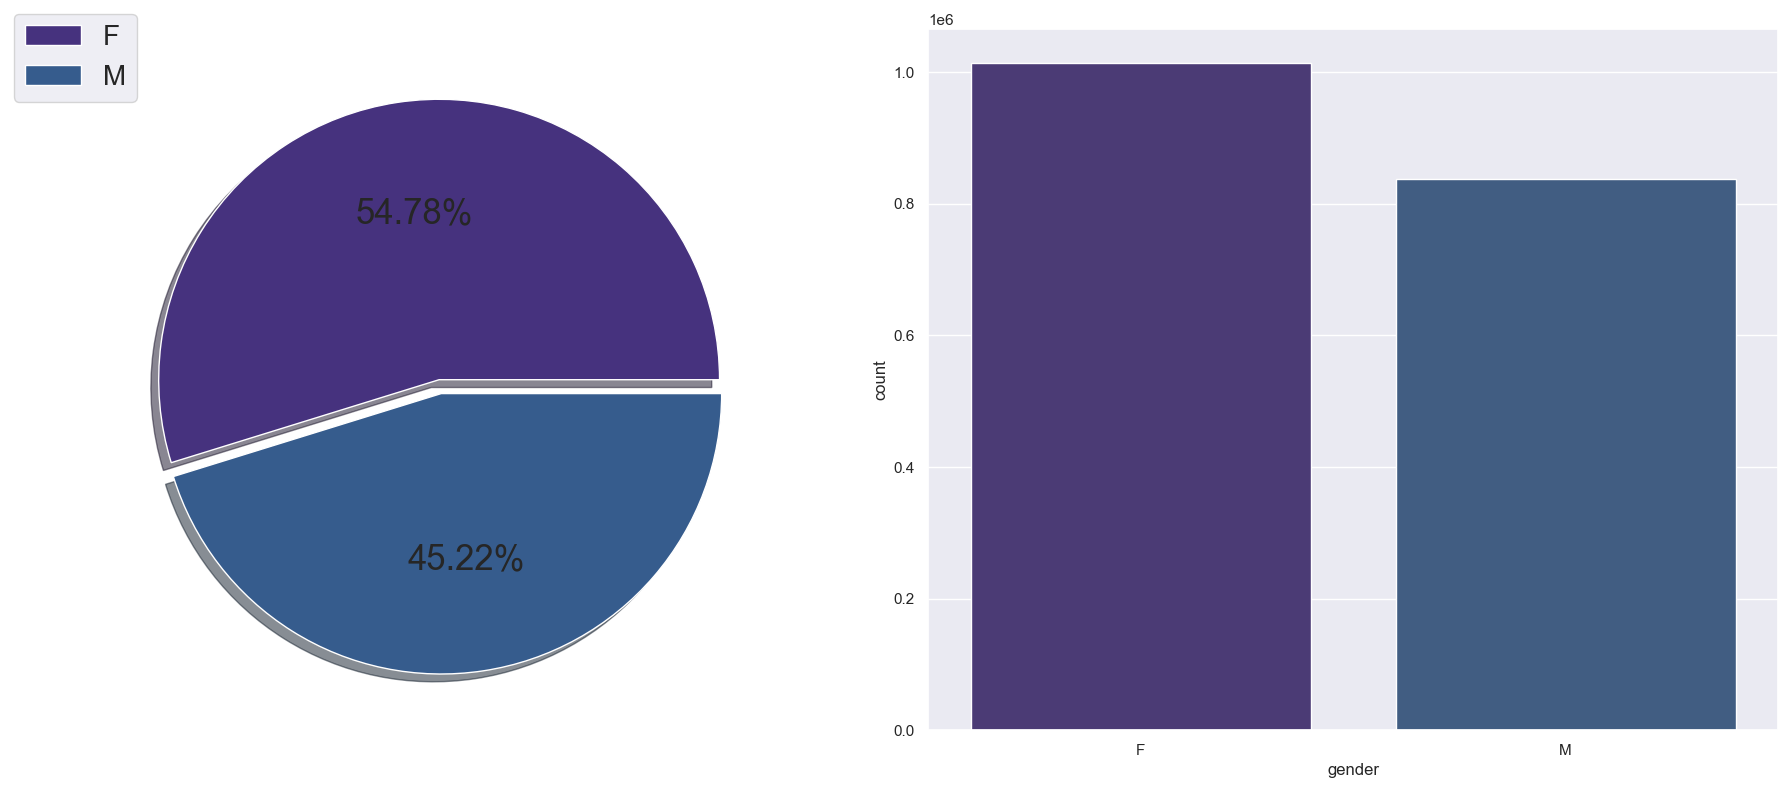

In [29]:
pie_bar_plot('gender')

## وضعیت تقلب 

0    1842743
1       9651
Name: is_fraud, dtype: int64


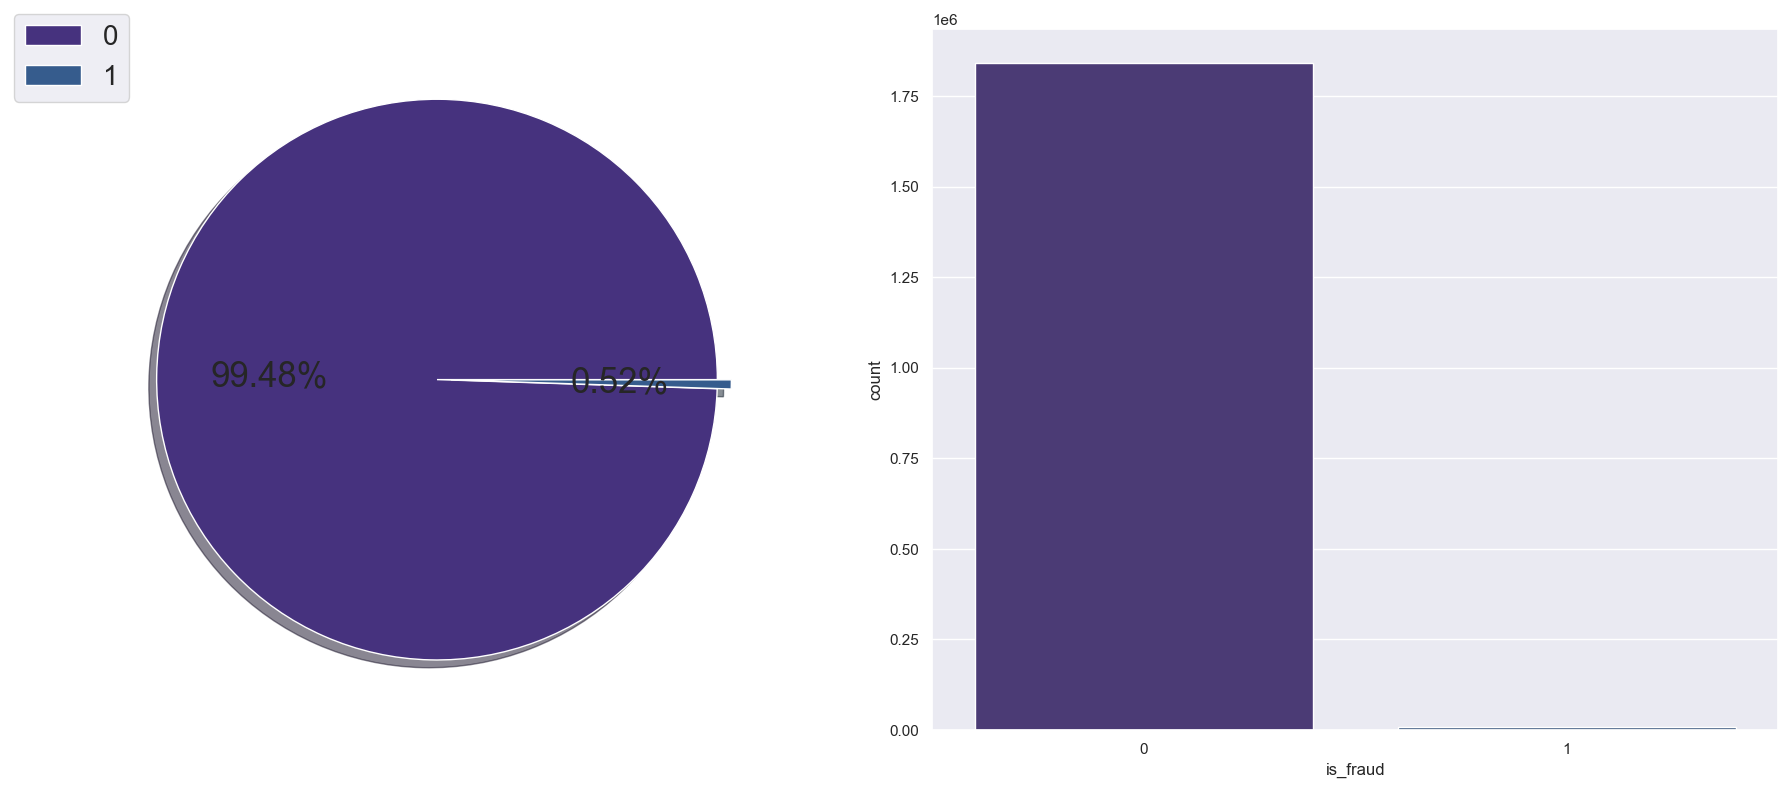

In [30]:
pie_bar_plot('is_fraud')

## بررسی بیشترین تعداد تقلب بر اساس روز ماه وساعت

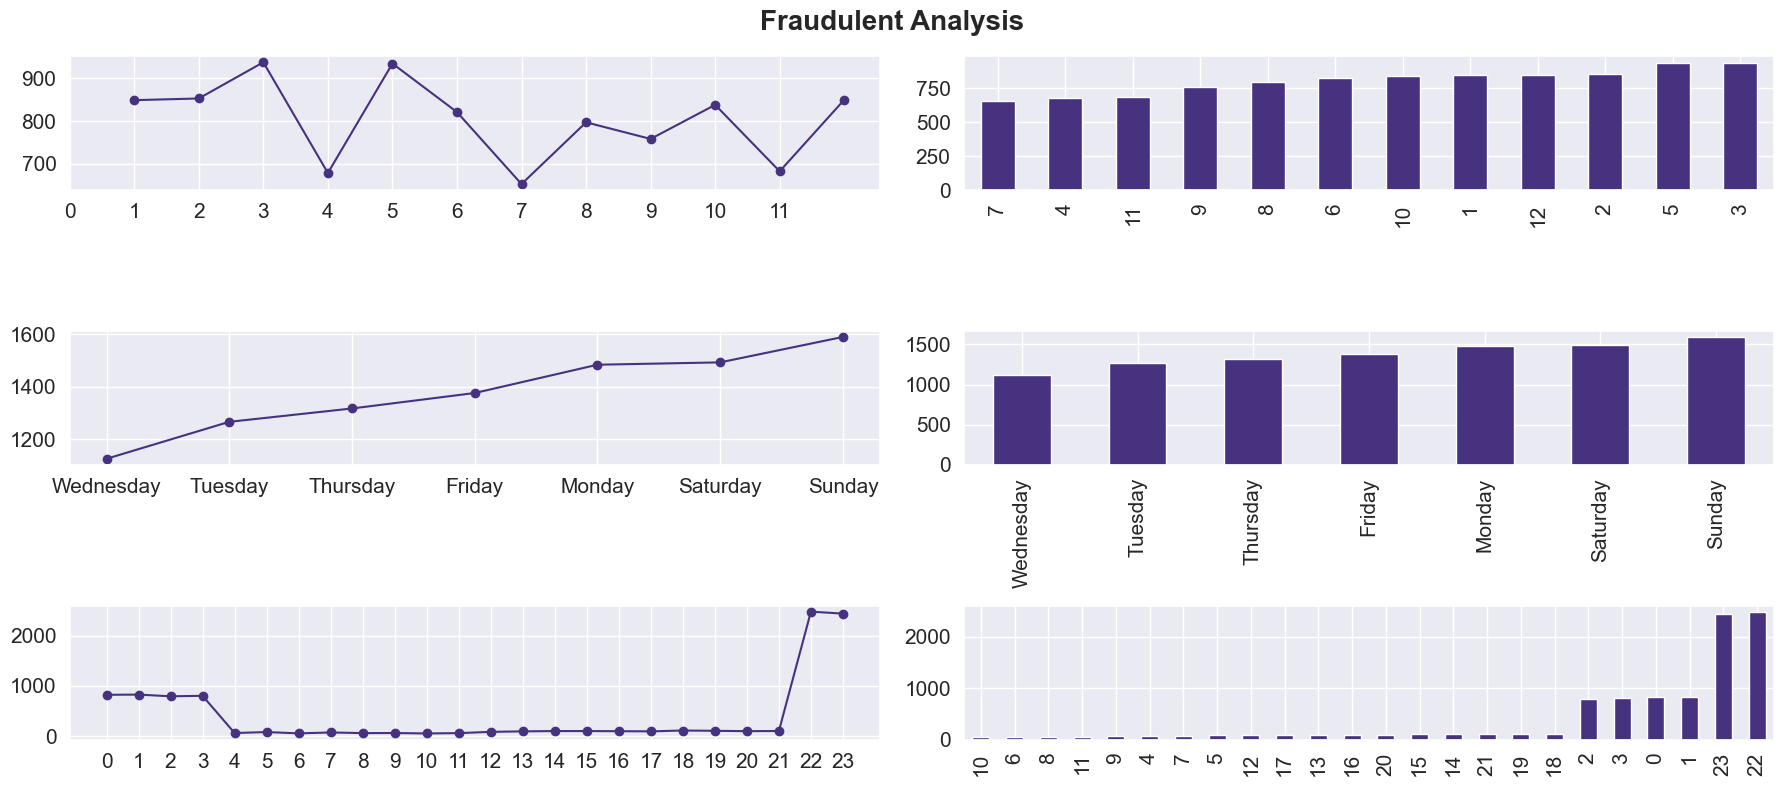

In [32]:
fig,axs = plt.subplots(3,2)
#Month
df.loc[df['is_fraud']==1,'month'].value_counts().sort_index().plot(kind='line',ax=axs[0,0],marker='o',fontsize=15)
axs[0,0].set_xticks(range(0,12))
df.loc[df['is_fraud']==1,'month'].value_counts(ascending=True).plot(kind='bar',ax=axs[0,1],fontsize=15)
fig.suptitle('Fraudulent Analysis', fontsize=18, fontweight='bold')
##Day
df.loc[df['is_fraud']==1,'day'].value_counts(ascending=True).plot(kind='line',ax=axs[1,0],marker='o',fontsize=15)
df.loc[df['is_fraud']==1,'day'].value_counts(ascending=True).plot(kind='bar',ax=axs[1,1],fontsize=15)
#Hour 
df.loc[df['is_fraud']==1,'hour'].value_counts().sort_index().plot(kind='line',ax=axs[2,0],marker='o',fontsize=15)
axs[2,0].set_xticks(range(0,24))
df.loc[df['is_fraud']==1,'hour'].value_counts(ascending=True).plot(kind='bar',ax=axs[2,1],fontsize=15)
fig.suptitle('Fraudulent Analysis', fontsize=20, fontweight='bold')
plt.tight_layout()

In [33]:
df.loc[df['is_fraud']==1,['gender']].value_counts()

gender
F         4899
M         4752
dtype: int64

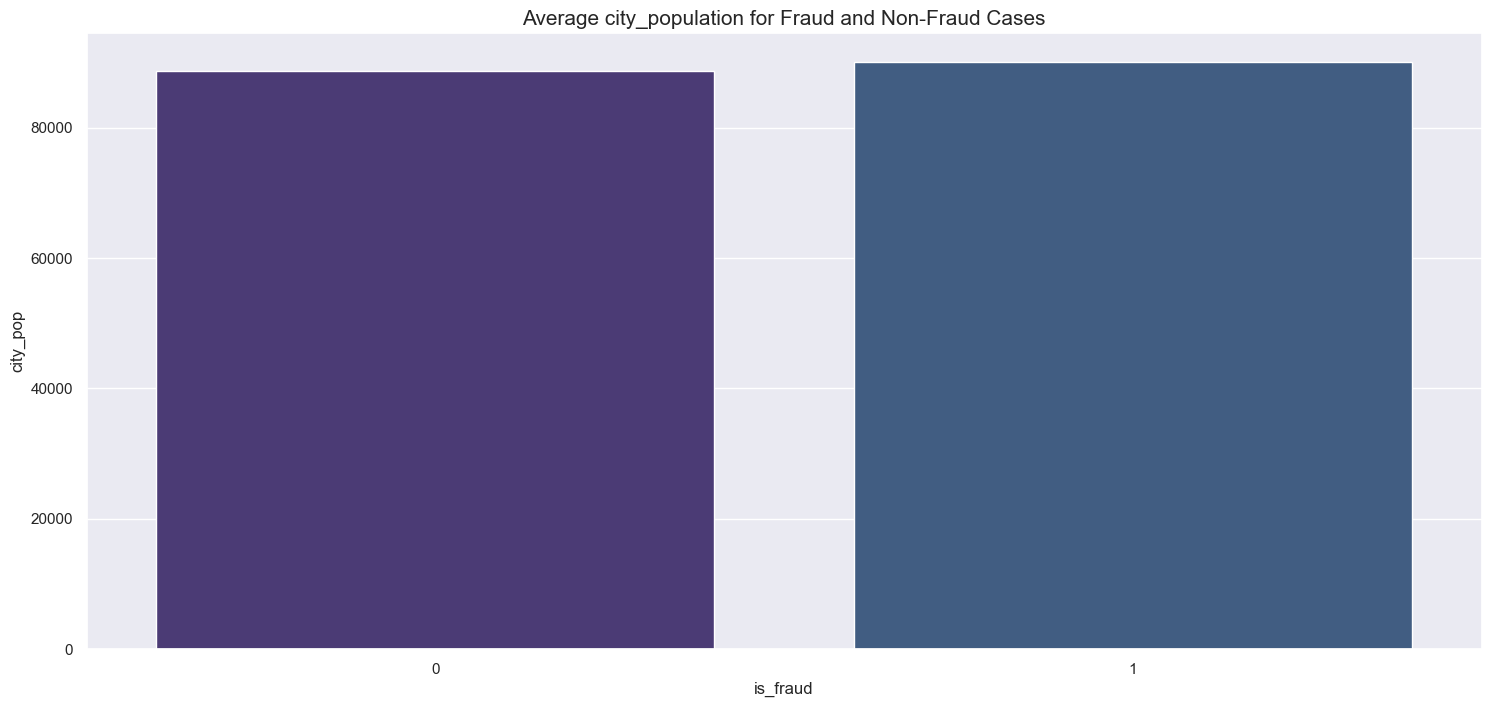

T-test: t-statistic = 0.443, p-value = 0.658, p-value<0.05? False


In [34]:
sns.barplot(data=df,x='is_fraud', y='city_pop', ci=None)
plt.title('Average city_population for Fraud and Non-Fraud Cases',fontsize=15)
plt.show()

fraud_population = df[df['is_fraud'] == 1]['city_pop']
non_fraud_population = df[df['is_fraud'] == 0]['city_pop']
t_stat, p_value = ttest_ind(fraud_population, non_fraud_population)
print(f'T-test: t-statistic = {round(t_stat,3)}, p-value = {round(p_value,3)}, p-value<0.05? {p_value<0.05}')

In [35]:
df.head(3)

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,zip,city_pop,job,is_fraud,split,hour,day,month,age,distance_km
0,2019-01-01 00:00:18,2703186189652095,"Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,28654,3495,"Psychologist, counselling",0,train,0,Tuesday,1,31,78.60
1,2019-01-01 00:00:44,630423337322,"Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,99160,149,Special educational needs teacher,0,train,0,Tuesday,1,41,30.21
2,2019-01-01 00:00:51,38859492057661,Lind-Buckridge,entertainment,220.11,M,Malad City,83252,4154,Nature conservation officer,0,train,0,Tuesday,1,57,108.21


## جنسیت را به باینری تغییر می دهیم

In [36]:
df = pd.get_dummies(df,columns=['gender'],drop_first=True)

## زمان بین هر تراکنش را مشخص می کنیم 

In [37]:
#Time=0 for every first transaction 
df.sort_values(['cc_num', 'trans_date_trans_time'],inplace=True)
df['hours_diff_bet_trans']=((df.groupby('cc_num')[['trans_date_trans_time']].diff())/np.timedelta64(1,'h'))

In [38]:
df.loc[df['hours_diff_bet_trans'].isna(),'hours_diff_bet_trans'] = 0
df['hours_diff_bet_trans'] = df['hours_diff_bet_trans'].astype(int)

                T          p-val
T-test  27.266899  7.200860e-158


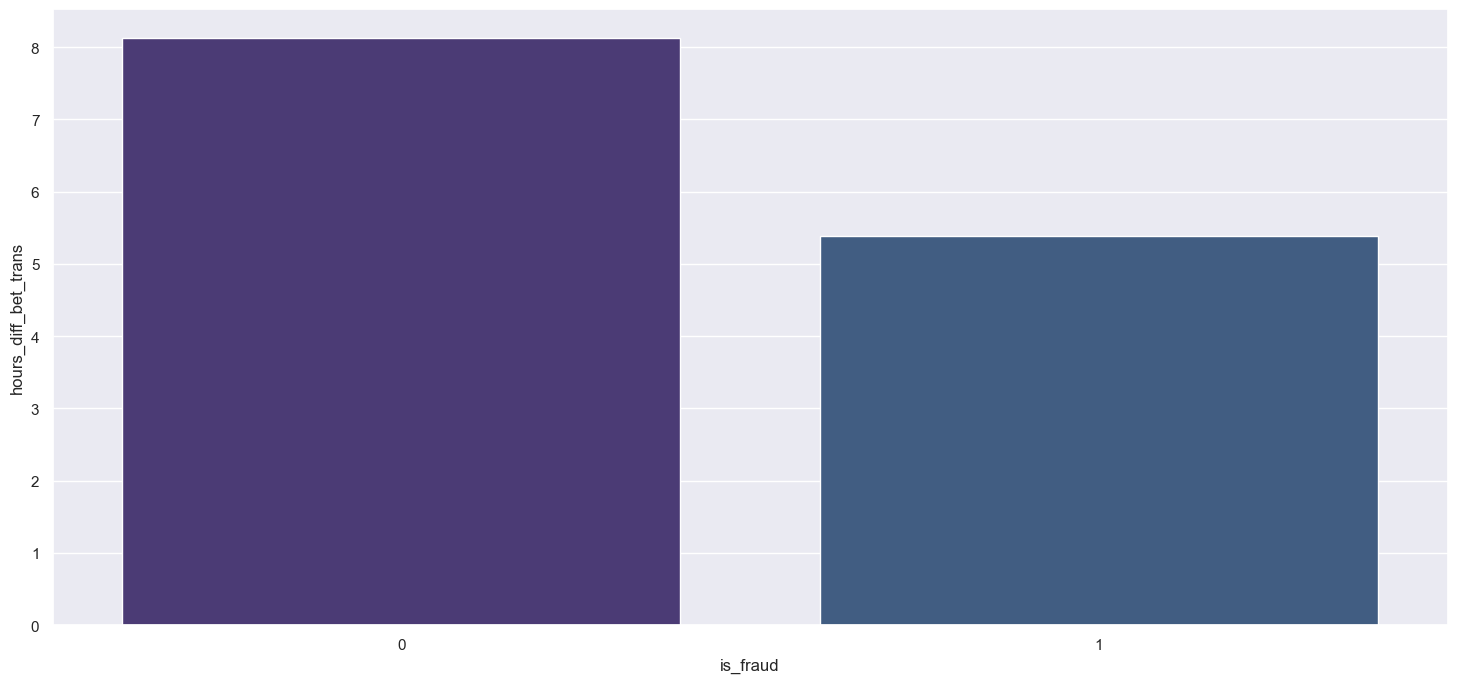

In [39]:
print(pingouin.ttest(df[df['is_fraud'] == 0]['hours_diff_bet_trans'],
              df[df['is_fraud'] == 1]['hours_diff_bet_trans'],
              alternative='two-sided')[['T','p-val']])
sns.barplot(data=df,x='is_fraud',y='hours_diff_bet_trans',ci=None)
plt.show()

## تبدیل روز به متغیر عددی

In [40]:
#Make day feature numerical
df['day'] = df['trans_date_trans_time'].dt.weekday

## پیدا کردن تعداد استفاده از کارت اعتباری بر اساس شماره کارت

In [41]:
#Handling and extracting features from cc_num
freq = df.groupby('cc_num').size()
df['cc_freq'] = df['cc_num'].apply(lambda x : freq[x])
df[['cc_num','cc_freq']].head()

,cc_num,cc_freq
1017,60416207185,2196
2724,60416207185,2196
2726,60416207185,2196
2882,60416207185,2196
2907,60416207185,2196


In [42]:
def hist_show(col):
    fig,axs = plt.subplots(1,2,sharex=True)
    for i in [0,1]:
        sns.histplot(df[df["is_fraud"]==i][col], bins=6,ax=axs[i])

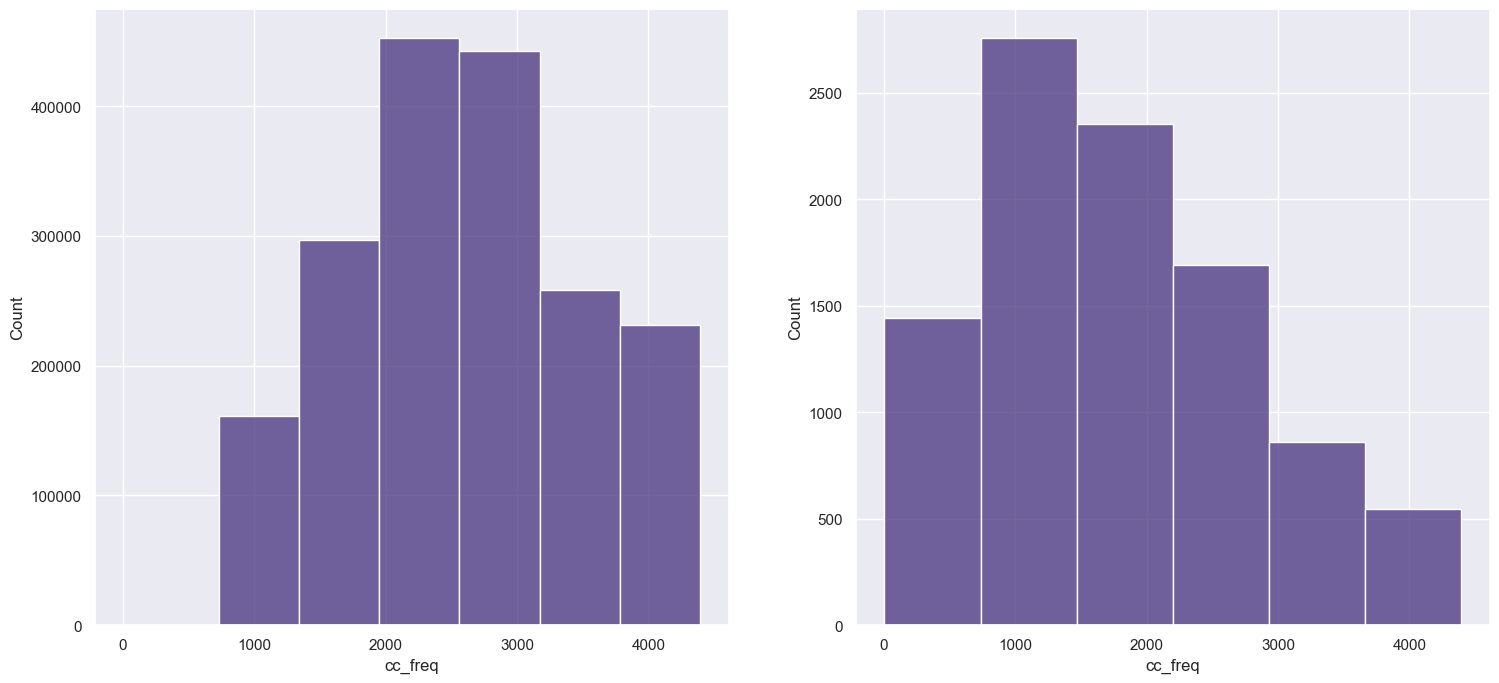

In [43]:
hist_show('cc_freq')

In [44]:
def class_det(x):
    for idx,val in enumerate(list(range(800,5000,800))):
        if x < val:
            return idx+1

In [45]:
df['cc_freq_class'] = df['cc_freq'].apply(class_det)
print(df['cc_freq_class'].unique())

[3 1 2 4 5 6]


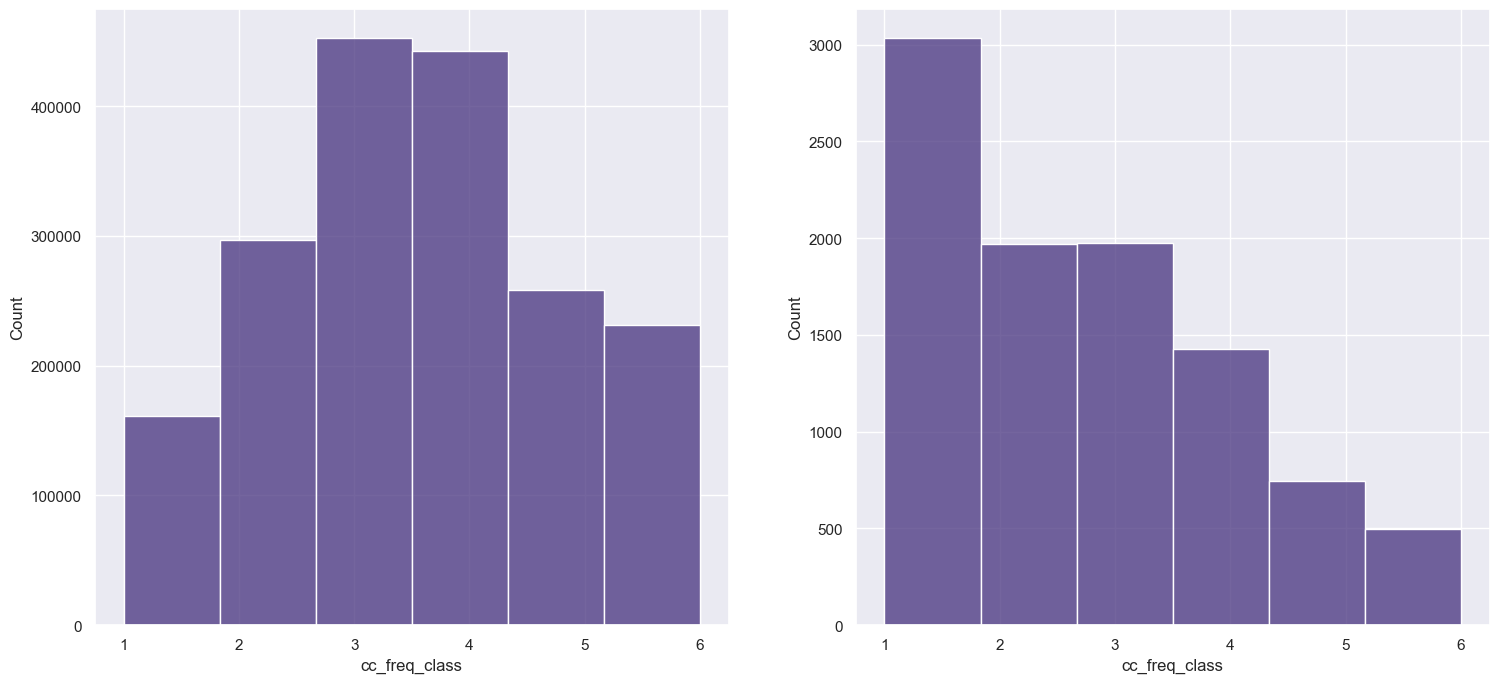

In [46]:
hist_show('cc_freq_class')

## حذف ستون های غیر ضروری

In [47]:
df.drop(columns=['cc_num','trans_date_trans_time','city_pop'],inplace=True)

In [48]:
df.columns

Index(['merchant', 'category', 'amt', 'city', 'zip', 'job', 'is_fraud',
       'split', 'hour', 'day', 'month', 'age', 'distance_km', 'gender_M',
       'hours_diff_bet_trans', 'cc_freq', 'cc_freq_class'],
      dtype='object')

## مرتب کردن ستون ها 

In [49]:
df = df[['cc_freq','cc_freq_class','city','job','age','gender_M','merchant', 'category',
         'distance_km','month','day','hour','hours_diff_bet_trans','amt','is_fraud','split']]
df.head()

,cc_freq,cc_freq_class,city,job,age,gender_M,merchant,category,distance_km,month,day,hour,hours_diff_bet_trans,amt,is_fraud,split
1017,2196,3,Fort Washakie,Information systems manager,33,0,"Jones, Sawayn and Romaguera",misc_net,127.61,1,1,12,0,7.27,0,train
2724,2196,3,Fort Washakie,Information systems manager,33,0,Berge LLC,gas_transport,110.31,1,2,8,19,52.94,0,train
2726,2196,3,Fort Washakie,Information systems manager,33,0,Luettgen PLC,gas_transport,21.79,1,2,8,0,82.08,0,train
2882,2196,3,Fort Washakie,Information systems manager,33,0,Daugherty LLC,kids_pets,87.20,1,2,12,3,34.79,0,train
2907,2196,3,Fort Washakie,Information systems manager,33,0,Beier and Sons,home,74.21,1,2,13,0,27.18,0,train


##  تبدیل شهر شغل تاجر و دسته بندی 

In [50]:
for col in ['city','job','merchant', 'category']:
    df[col] = WOEEncoder().fit_transform(df[col],df['is_fraud'])

In [51]:
# WOE > 0: The category is more likely associated with (fraud)
# WOE < 0: The category is more likely associated with (non-fraud)
df.head()

,cc_freq,cc_freq_class,city,job,age,gender_M,merchant,category,distance_km,month,day,hour,hours_diff_bet_trans,amt,is_fraud,split
1017,2196,3,-0.193426,0.163804,33,0,0.472059,0.925860,127.61,1,1,12,0,7.27,0,train
2724,2196,3,-0.193426,0.163804,33,0,-0.499771,-0.238221,110.31,1,2,8,19,52.94,0,train
2726,2196,3,-0.193426,0.163804,33,0,-0.132212,-0.238221,21.79,1,2,8,0,82.08,0,train
2882,2196,3,-0.193426,0.163804,33,0,-0.620062,-1.019735,87.20,1,2,12,3,34.79,0,train
2907,2196,3,-0.193426,0.163804,33,0,-1.296190,-1.238421,74.21,1,2,13,0,27.18,0,train


## تبدیل مجموعه کلی به مجموعه آموزش و تست

In [52]:
x_train = df[df['split']=='train'].drop(['split','is_fraud'],axis=1)
y_train = df[df['split']=='train']['is_fraud']
x_test = df[df['split']=='test'].drop(['split','is_fraud'],axis=1)
y_test = df[df['split']=='test']['is_fraud']

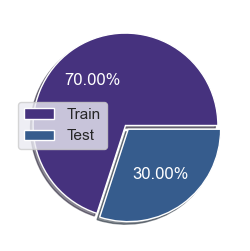

In [53]:
plt.figure(figsize=(3,3))
plt.pie([len(x_train),len(x_test)],autopct='%.2f%%'
        ,textprops={'color':'white'},explode=[0,0.05],shadow=True)
plt.legend(['Train','Test'])
plt.show()

## رسیدگی به موارد پرت

In [54]:
x_train.select_dtypes(include='number').columns

Index(['cc_freq', 'cc_freq_class', 'city', 'job', 'age', 'gender_M',
       'merchant', 'category', 'distance_km', 'month', 'day', 'hour',
       'hours_diff_bet_trans', 'amt'],
      dtype='object')

In [55]:
datasets={'x_train':x_train,'x_test':x_test}
cols = ['hours_diff_bet_trans', 'amt']

In [56]:
#Outliers in train data before scaling
def count_outliers(l:list):
    for col in l:
        print(f'Outliers In {col}:',len(detect_outliers(x_train,0,[col])))

In [57]:
def boxplot_outliers(ds:dict):
    plt.figure(figsize=(18,8))
    c=1
    for _,df_x in ds.items():
        for col in ['hours_diff_bet_trans', 'amt']:
            plt.subplot(2,2,c)
            df_x[col].plot(kind='box',vert=False)
            c+=1        
    plt.suptitle('Detecting Outliers In Train|Test Data',fontsize=20)
    plt.tight_layout()

Outliers In hours_diff_bet_trans: 86989
Outliers In amt: 67290


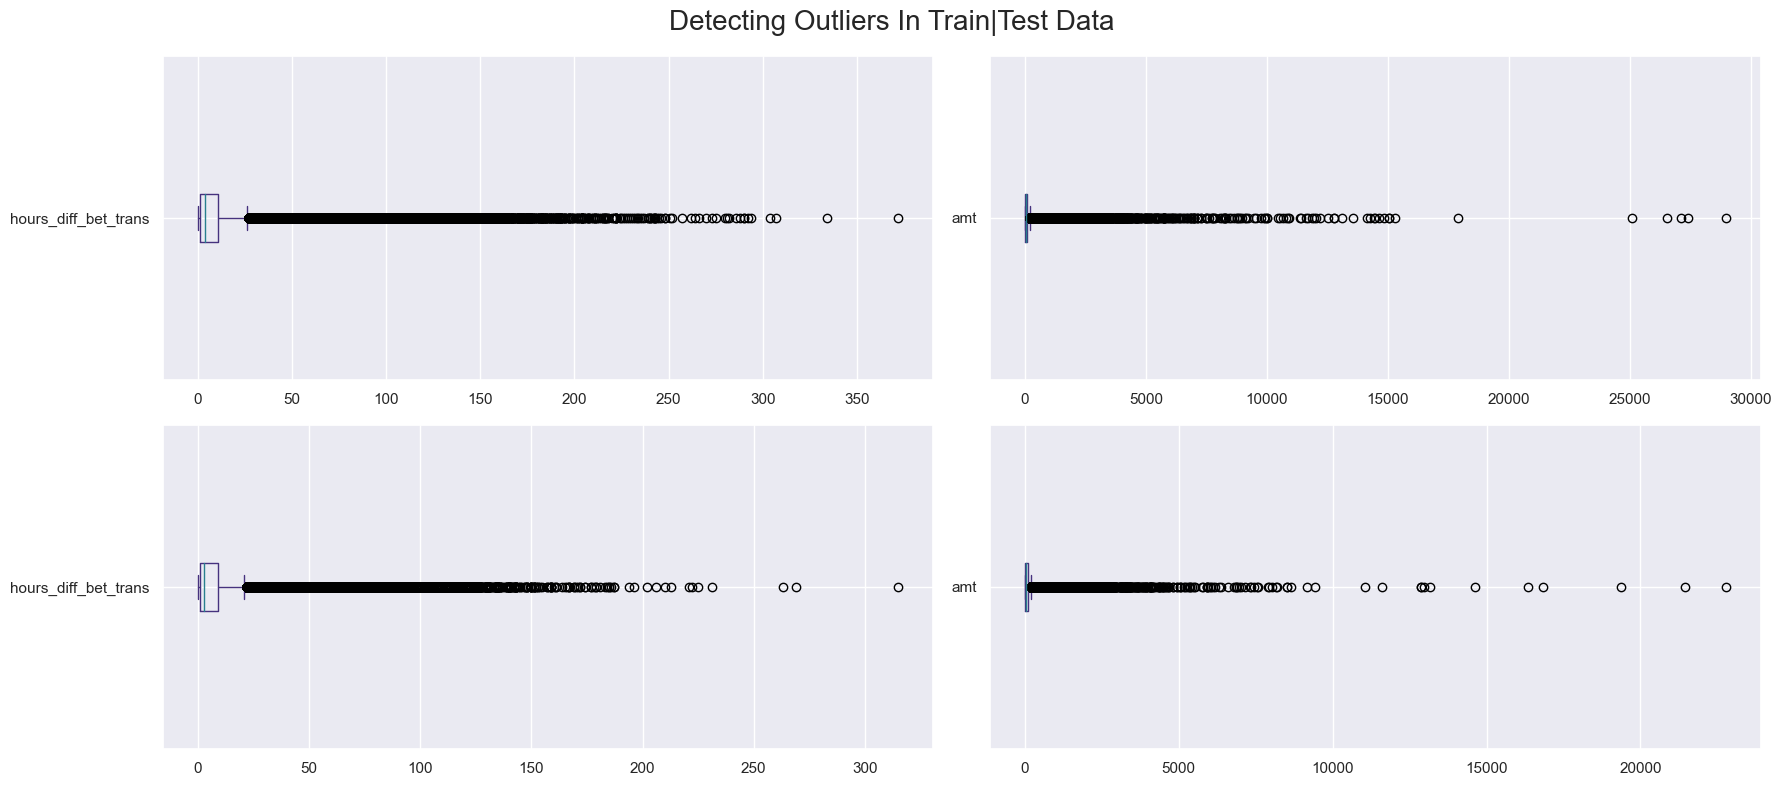

In [58]:
count_outliers(cols)
boxplot_outliers(datasets)

In [59]:
#Applying log scale
for col in cols:
    x_train[col] = np.log1p(x_train[col])
    x_test[col] = np.log1p(x_test[col])

Outliers In hours_diff_bet_trans: 222
Outliers In amt: 818


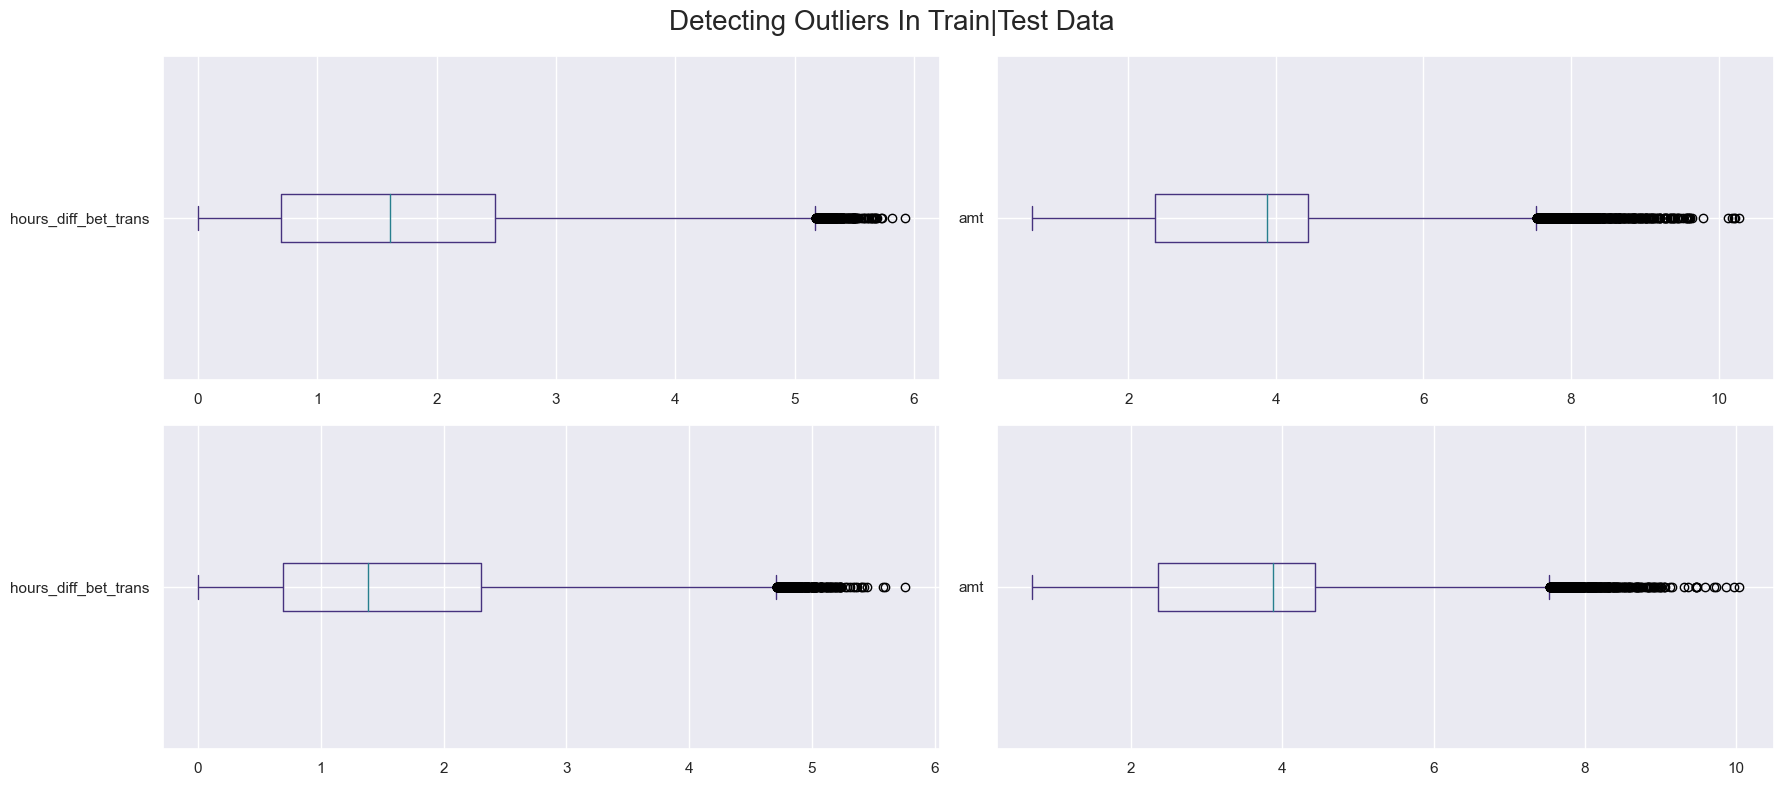

In [60]:
count_outliers(cols)
boxplot_outliers(datasets)

# توجه
رگرسیون لجستیک اغلب از مقیاس بندی ویژگی ها سود می برد. از آنجایی که الگوریتم از وزن های تخصیص یافته به ویژگی ها در طول آموزش استفاده می کند و داشتن ویژگی هایی در مقیاس های مشابه می تواند به همگرایی سریعتر فرآیند بهینه سازی کمک کند.
در حالی که درختان تصمیم، از جمله جنگل تصادفی (مجموعه ای از درختان تصمیم)، معمولاً به مقیاس ویژگی ها حساس نیستند. آنها بر اساس معیارهای تقسیم تصمیم می گیرند و بر مقادیر مطلق ویژگی ها تکیه نمی کنند.

In [61]:
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

##  تعریف مدل ها

In [62]:
evl_models = {'Logistic Regression':LogisticRegression(random_state=10),
          'Decision Tree':DecisionTreeClassifier(random_state=10),
          'Random Forest':RandomForestClassifier(random_state=10)}

## تابع برای آموزش و بررسی نتایج

In [63]:
def evl_model(xtrain,ytrain,xtest,ytest):
    sns.set(rc={'figure.figsize':(18,6)})
    i=0
    for name,model in evl_models.items():
        fig,axs=plt.subplots(1,2)
        print('Model : '+name)
        print('_'*30)
        start=time()
        model.fit(xtrain,ytrain)
        y_pred = model.predict(xtest)
        end=time()
        #Confusion Matrix
        cm = confusion_matrix(ytest,y_pred,labels=model.classes_)
        cmd = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
        cmd.plot(colorbar=False,ax=axs[i])
        axs[i].grid(False)
        #AUC-ROC Curve
        y_proba = model.predict_proba(xtest)
        fpr, tpr, _ = roc_curve(ytest, y_proba[:, 1])
        roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot(ax=axs[i+1])
        axs[i+1].plot([0, 1], [0, 1], color = 'g')
        plt.tight_layout()
        plt.show()
        #We focus on recall=TP/TP+FN
        print('Recall Score: ',recall_score(ytest,y_pred))
        print('Precision: ',precision_score(ytest,y_pred))
        print('F1-Score: ',f1_score(ytest,y_pred))
        print('Accuracy Score: ',accuracy_score(ytest,y_pred))
        print('AUC Score: ',roc_auc_score(ytest,y_proba[:,1]))
        print('Running Time : ',round((end-start)/60.0,2),'Mins')
        print('*'*30)

## نتیجه نهایی 

Model : Logistic Regression
______________________________


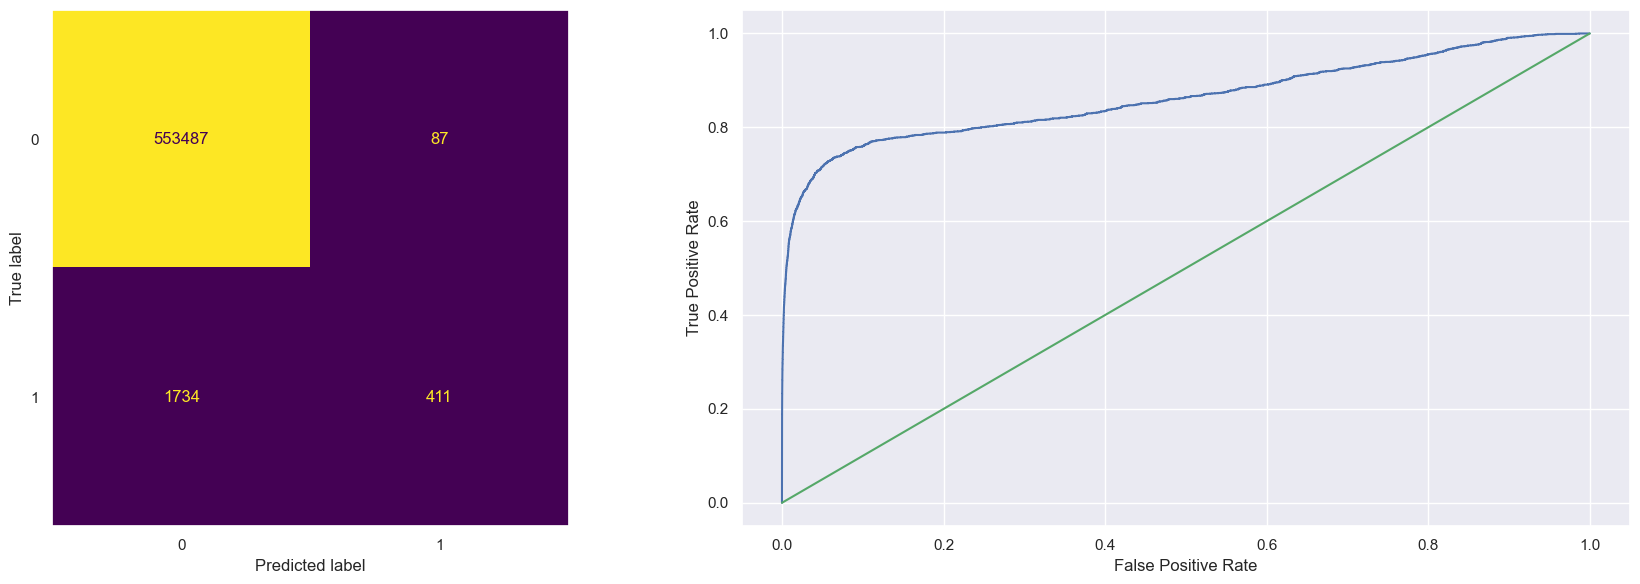

Recall Score:  0.1916083916083916
Precision:  0.8253012048192772
F1-Score:  0.3110102156640182
Accuracy Score:  0.9967231640451379
AUC Score:  0.8631322009132382
Running Time :  0.08 Mins
******************************
Model : Decision Tree
______________________________


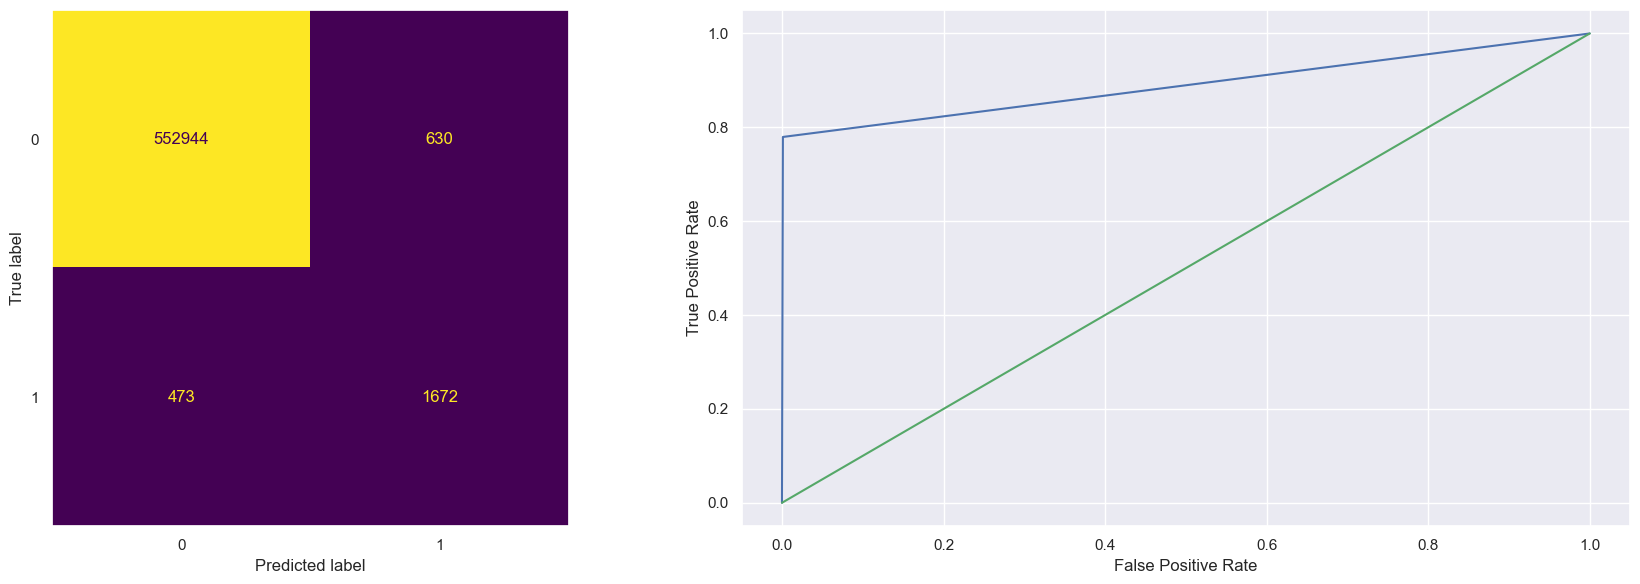

Recall Score:  0.7794871794871795
Precision:  0.7263249348392702
F1-Score:  0.7519676186192938
Accuracy Score:  0.9980151839328869
AUC Score:  0.8891745601287595
Running Time :  0.22 Mins
******************************
Model : Random Forest
______________________________


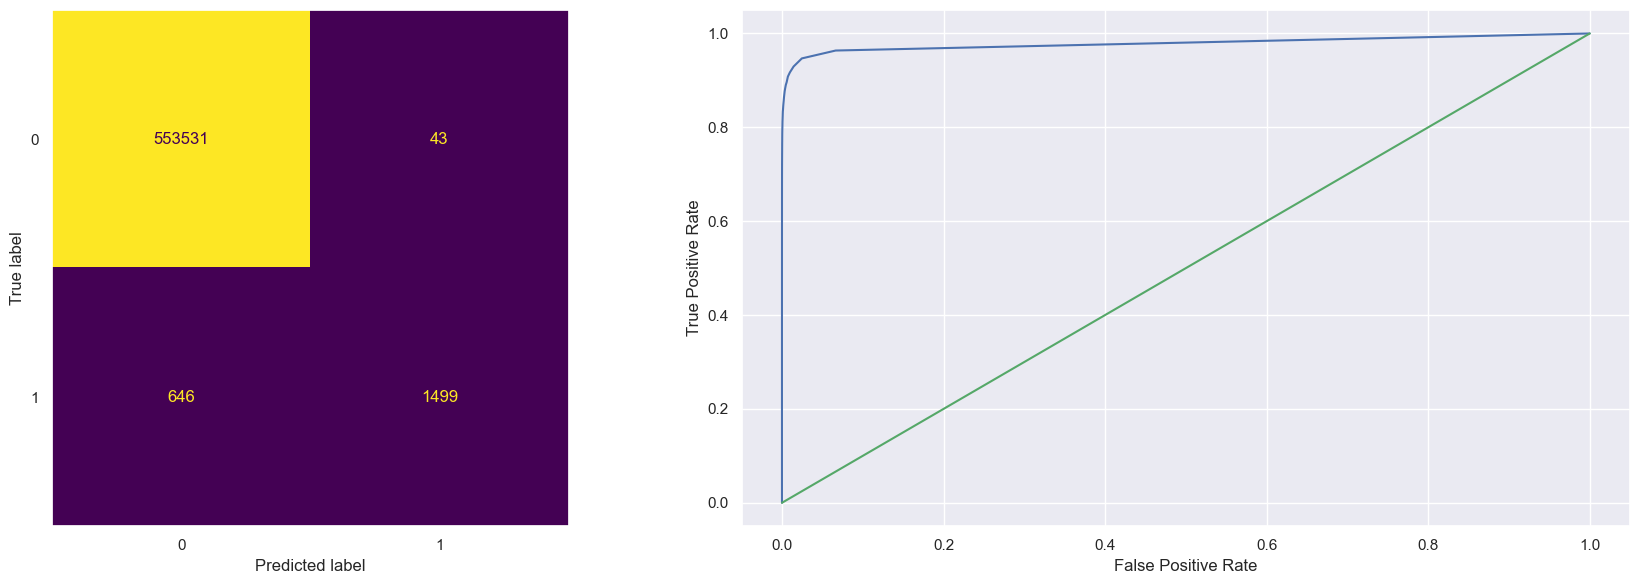

Recall Score:  0.6988344988344989
Precision:  0.9721141374837873
F1-Score:  0.8131272036886358
Accuracy Score:  0.9987601647595278
AUC Score:  0.9789703059726579
Running Time :  6.58 Mins
******************************


In [64]:
evl_model(x_train,y_train,x_test,y_test)

## با توجه به بالانس نبودن دیتاست از تکنیک اسموت استفاده می کنیم

In [67]:
smote = SMOTE()
x_train,y_train = smote.fit_resample(x_train,y_train)

<Axes: ylabel='is_fraud'>

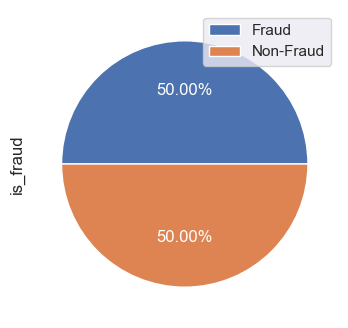

In [68]:
y_train.value_counts().plot(kind='pie',figsize=(4,4),autopct='%.2f%%',textprops={'color':'white'},labels=['Fraud','Non-Fraud'],legend=True)

## نتیجه نهایی بعد از پیاده سازی اسموت

Model : Logistic Regression
______________________________


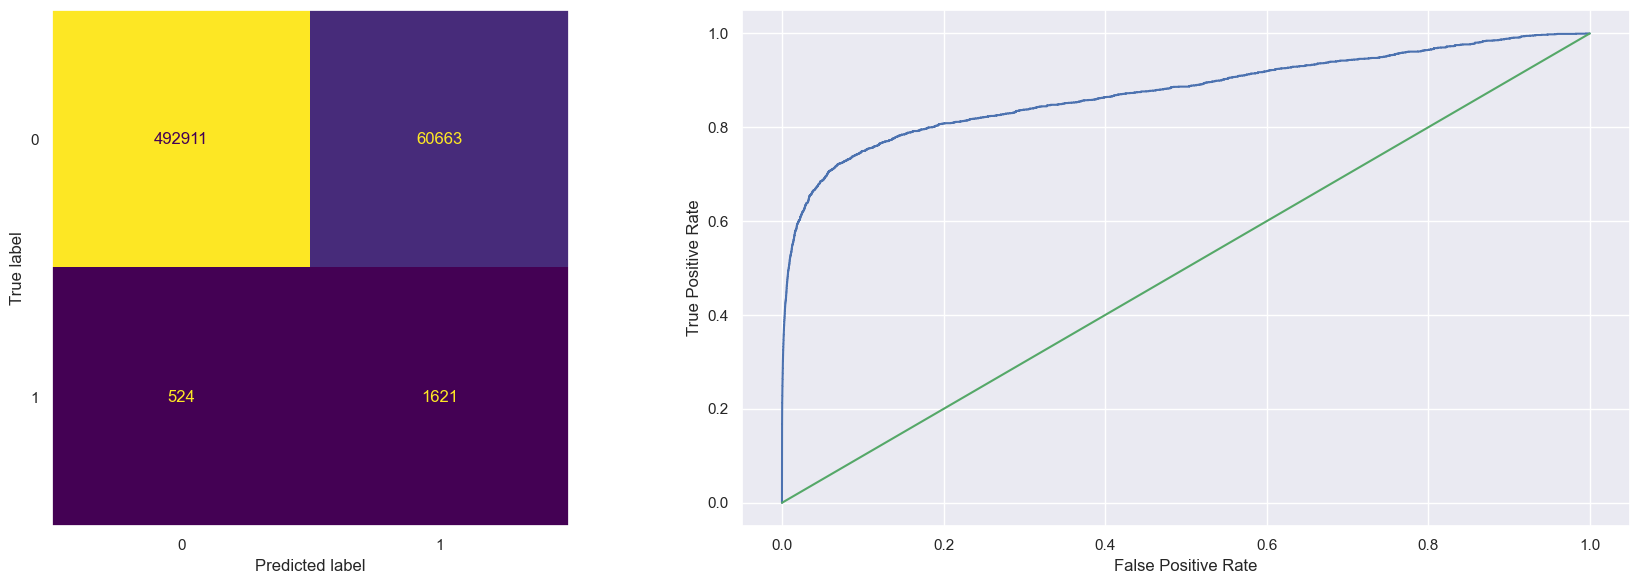

Recall Score:  0.7557109557109557
Precision:  0.0260259456682294
F1-Score:  0.050318955749740026
Accuracy Score:  0.8898957926578
AUC Score:  0.8748348159263412
Running Time :  0.14 Mins
******************************
Model : Decision Tree
______________________________


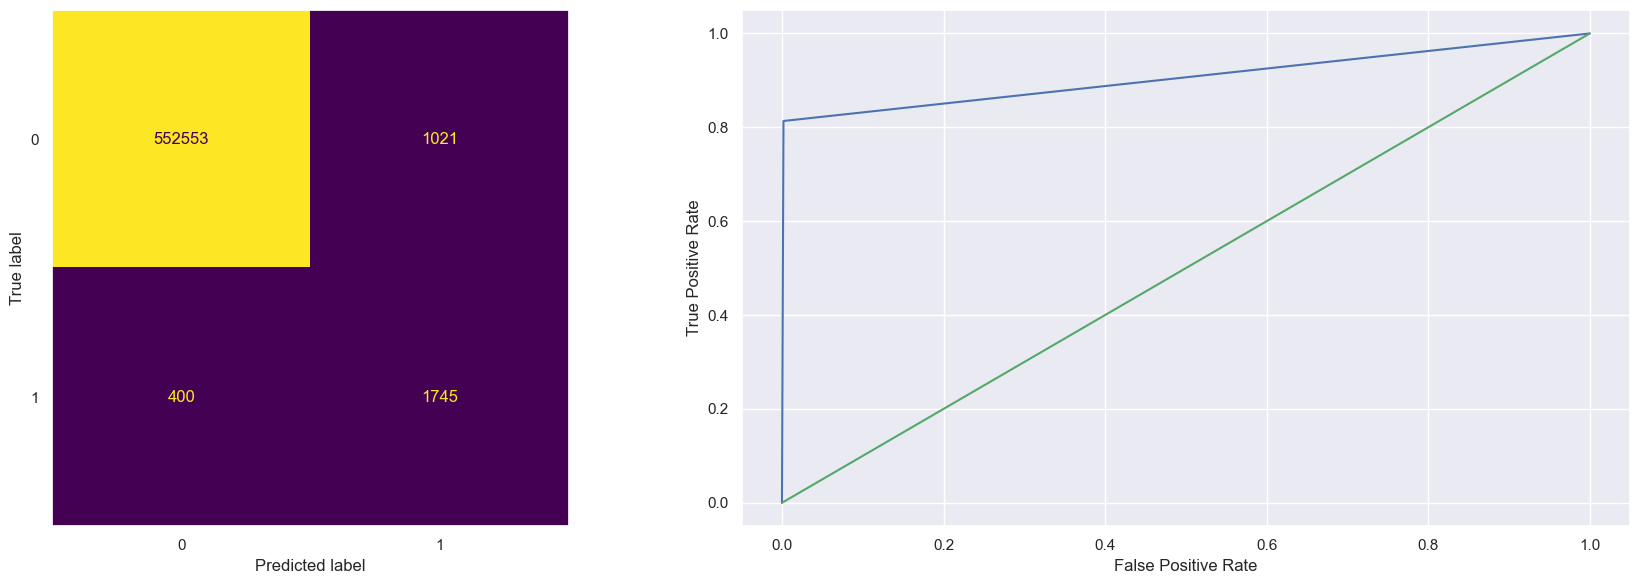

Recall Score:  0.8135198135198135
Precision:  0.6308749096167752
F1-Score:  0.7106495622072897
Accuracy Score:  0.9974429522834383
AUC Score:  0.9058377174952376
Running Time :  1.21 Mins
******************************
Model : Random Forest
______________________________


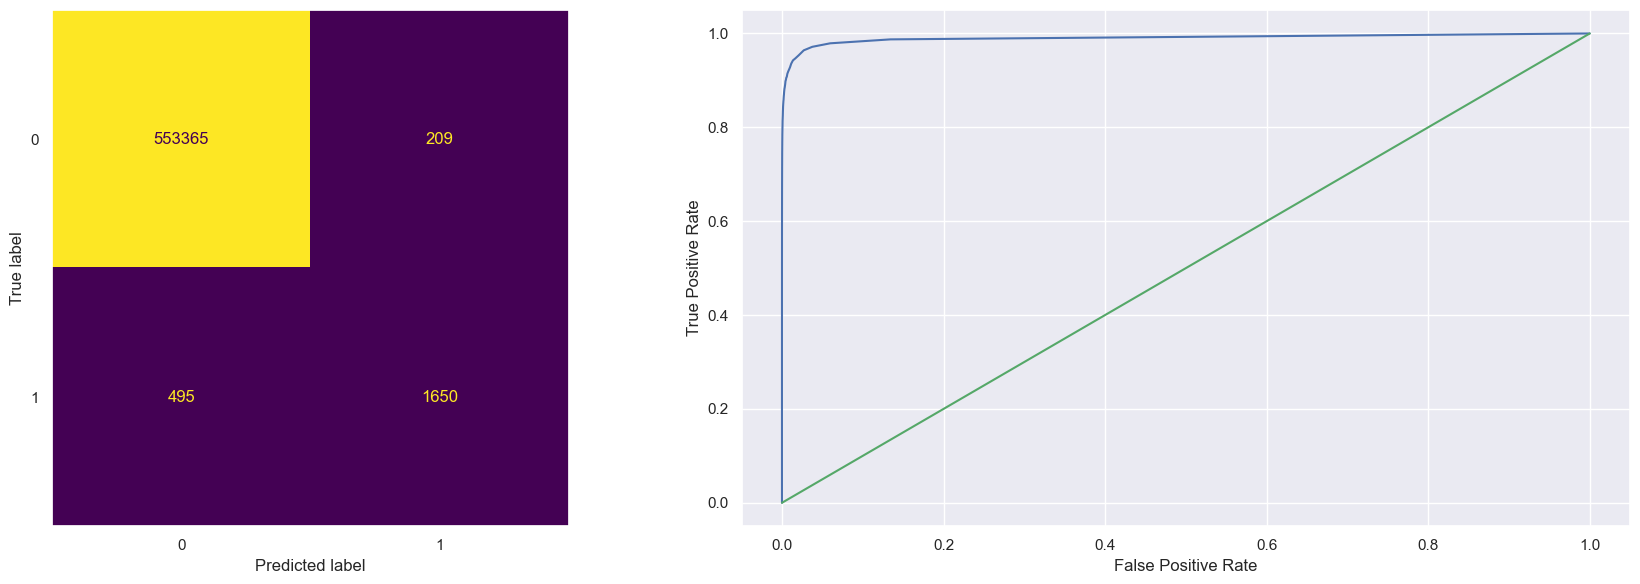

Recall Score:  0.7692307692307693
Precision:  0.8875739644970414
F1-Score:  0.8241758241758241
Accuracy Score:  0.9987331727005915
AUC Score:  0.9903980535957472
Running Time :  22.76 Mins
******************************


In [69]:
evl_model(x_train,y_train,x_test,y_test)

## با تشکر از زحمات شما 

## پایان